## Скачивание

In [ ]:
# !wget 123.57.42.89/Dataset_ict/LogoDet-3K.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# !cp LogoDet-3K.zip /content/drive/MyDrive/Ad\ Detection/data

## Обработка

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1ygcrk_VwCKF9fmzPy6-iQqLoGdXnDW2Q/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1ygcrk_VwCKF9fmzPy6-iQqLoGdXnDW2Q
To: /content/LogoDet-3K.zip
100% 3.08G/3.08G [00:19<00:00, 161MB/s]


In [ ]:
!unzip  /content/LogoDet-3K.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: LogoDet-3K/Transportation/pakistan state oil/25.jpg  
  inflating: LogoDet-3K/Transportation/pakistan state oil/25.xml  
  inflating: LogoDet-3K/Transportation/pakistan state oil/29.jpg  
  inflating: LogoDet-3K/Transportation/pakistan state oil/29.xml  
  inflating: LogoDet-3K/Transportation/pakistan state oil/3.jpg  
  inflating: LogoDet-3K/Transportation/pakistan state oil/3.xml  
  inflating: LogoDet-3K/Transportation/pakistan state oil/30.jpg  
  inflating: LogoDet-3K/Transportation/pakistan state oil/30.xml  
  inflating: LogoDet-3K/Transportation/pakistan state oil/31.jpg  
  inflating: LogoDet-3K/Transportation/pakistan state oil/31.xml  
  inflating: LogoDet-3K/Transportation/pakistan state oil/33.jpg  
  inflating: LogoDet-3K/Transportation/pakistan state oil/33.xml  
  inflating: LogoDet-3K/Transportation/pakistan state oil/38.jpg  
  inflating: LogoDet-3K/Transportation/pakistan state oil/38.xm

In [ ]:
!find /content/LogoDet-3K -type f -name '*.xml' > /content/LogoDet-3K/anno_paths.txt  # пути ко всем xmlькам

In [ ]:
!git clone https://github.com/Travvy88/AdvertiseDetection

Cloning into 'AdvertiseDetection'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 33 (delta 6), reused 32 (delta 5), pack-reused 0
Unpacking objects: 100% (33/33), done.


In [ ]:
from AdvertiseDetection.utils.data import add_path_to_xml, change_to_one_class
from tqdm.auto import tqdm 
with open('LogoDet-3K/anno_paths.txt', 'r') as f:
    for p in tqdm(f.read().split('\n')[:-1]):
        add_path_to_xml(p)
        change_to_one_class(p)

  0%|          | 0/158654 [00:00<?, ?it/s]

In [ ]:
# !grep -ERoh '<name>(.*)</name>' LogoDet-3K | sort | uniq | sed 's/<name>//g' | sed 's/<\/name>//g' > LogoDet-3K/brands.txt

In [ ]:
!echo "logo" > LogoDet-3K/brands.txt  # делаем список классов (у нас один класс logo)

In [ ]:
!python /content/AdvertiseDetection/utils/voc2coco.py \
    --ann_paths_list /content/LogoDet-3K/anno_paths.txt \
    --labels LogoDet-3K/brands.txt \
    --output LogoDet-3K/coco.json \
    --ext xml

Start converting !
100% 158655/158655 [00:10<00:00, 14440.82it/s]


In [ ]:
!mv LogoDet-3K logodet_coco

In [ ]:
import json 

with open('logodet_coco/coco.json') as json_file:
    data = json.load(json_file)

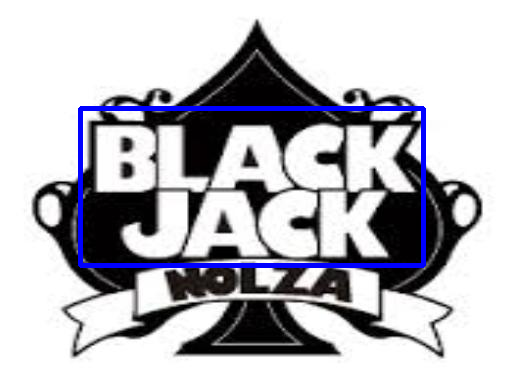

In [ ]:
## проверим, что все ок 

image = data['images'][2715]
file_name = image['file_name']
id = int(image['id'])
anno = data['annotations'][3256]
bbox = anno['bbox']


import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('logodet_coco/' + file_name)

pt1 = (bbox[0], bbox[1])
pt2 = (bbox[0] + bbox[2], bbox[1] + bbox[3])

img = cv2.rectangle(img, pt1, pt2, (255, 0, 0), 3)
cv2_imshow(img)

In [ ]:
!find logodet_coco -name "*.xml" -type f -delete  # удаляем xmlьки

In [ ]:
!zip -r logodet_coco.zip logodet_coco

Выходные данные были обрезаны до нескольких последних строк (5000).
  adding: logodet_coco/Food/Jus-Rol/36.jpg (deflated 19%)
  adding: logodet_coco/Food/Jus-Rol/96.jpg (deflated 19%)
  adding: logodet_coco/Food/Jus-Rol/101.jpg (deflated 1%)
  adding: logodet_coco/Food/Jus-Rol/200.jpg (deflated 2%)
  adding: logodet_coco/Food/Jus-Rol/120.jpg (deflated 3%)
  adding: logodet_coco/Food/Jus-Rol/61.jpg (deflated 7%)
  adding: logodet_coco/Food/Jus-Rol/187.jpg (deflated 1%)
  adding: logodet_coco/Food/Jus-Rol/106.jpg (deflated 1%)
  adding: logodet_coco/Food/Jus-Rol/164.jpg (deflated 5%)
  adding: logodet_coco/Food/Jus-Rol/131.jpg (deflated 1%)
  adding: logodet_coco/Food/Jus-Rol/12.jpg (deflated 5%)
  adding: logodet_coco/Food/Jus-Rol/10.jpg (deflated 7%)
  adding: logodet_coco/Food/Jus-Rol/45.jpg (deflated 3%)
  adding: logodet_coco/Food/Jus-Rol/176.jpg (deflated 1%)
  adding: logodet_coco/Food/Jus-Rol/123.jpg (deflated 2%)
  adding: logodet_coco/Food/Jus-Rol/95.jpg (deflated 8%)
  adding:

In [ ]:
!cp logodet_coco.zip /content/drive/MyDrive/Ad\ Detection/data